# **<h1 align ="middle"><b> Netflix Recommender System</b></h1>**

In [1]:
import pandas as pd  #pandas to load datasets
import numpy as np  #numpy for linear algebra
import matplotlib.pyplot as plt  #matplotlib for making plots
import seaborn as sns  #seaborn for making plots

<p>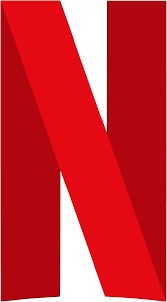</p>

### **<h1 align ="middle"><b> NETFLIX RECOMMENDER SYSTEM </b></h1>**

### **Recommender systems try to automate aspects of a completely different information discovery model where people try to find other people with similar tastes and then ask them to suggest new things.**

In [2]:
netflix_dataset = pd.read_csv(r"C:\Users\Lenovo\SSN Study Materials\ML My Works\Data Science Projects\Movie Recommendation\Netflix Dataset.csv")
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix_dataset.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

# **<center>Content-Based Recommendation System</center>**

## <center><u>Content-Based Filtering</u></center>


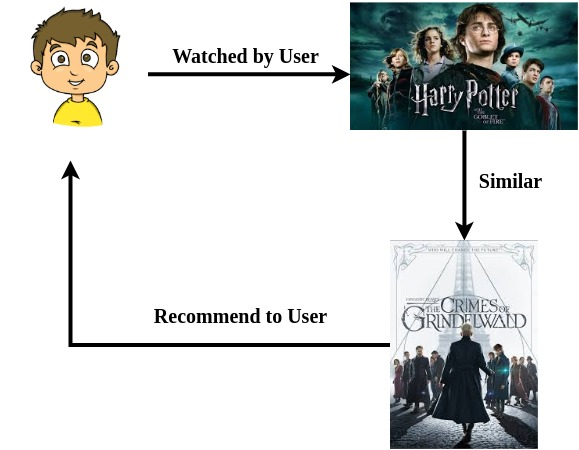

### **A content-based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated, which is then used to make suggestions to the user.**

#### **Filling NaN values with empty String ' '**

In [4]:
fill_netflix_dataset = netflix_dataset.fillna(' ')
fill_netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### **Term Frequency(TF) and Inverse Document Frequency(IDF)**

**Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

**TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)**


**Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However, it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scaling up the rare ones, by computing the following:

**IDF(t) = log_e(Total number of documents / Number of documents with term t in it)**

**TF-IDF** is used mainly because, Suppose we search for "the fundamental of DataScience" on Google. It is certain that "the" will occur more frequently than "DataScience" but the relative importance of "DataScience" is higher than "the" search query point of view.


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
#Removing stop words 
tf_idf = TfidfVectorizer(stop_words='english')

#Constructing TF-IDF matrix by transforming and fitting the data
tf_idf_matrix = tf_idf.fit_transform(fill_netflix_dataset['description'])

# shape of tf_idf_matrix
tf_idf_matrix.shape

(8807, 18895)

18895 words describing 8807 movies in the Netflix dataset

### **Cosine Similarity**

Cosine Similarity is used to calculate the numeric value that denotes the similarity between the two movies.

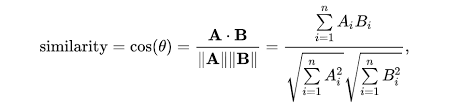


Now, we have used the TF-IDF Vectorizer, calculating the Dot product will directly give us the Cosine Similarity Score. Therefore, we will use **sklearn's linear_kernel** instead of cosine similarity since it calculate it much faster.

In [7]:
from sklearn.metrics.pairwise import linear_kernel

In [8]:
# calculating the Cosine Similarity Score

cosine_sim_score = linear_kernel(tf_idf_matrix, tf_idf_matrix)

In [9]:
cosine_sim_score[0]

array([1.        , 0.        , 0.        , ..., 0.        , 0.01538292,
       0.        ])

Now, we have a cosine similarity score matrix for all the movies in our Dataset.

In [10]:
netflix_index = netflix_dataset.index
titles = netflix_dataset['title']
indices = pd.Series(netflix_index, index = titles).drop_duplicates()

In [11]:
def get_recommendations(title, cosine_sim = cosine_sim_score):
    
    idx = indices[title]
    
    # Get the pairwise similarity scores of all movies with that movies
    sim_scores = list(enumerate(cosine_sim_score[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the Movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 Similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [12]:
get_recommendations('Mortel')

256                       Nneka The Pretty Serpent
3674                  PILI Fantasy: War of Dragons
800                                Mosquita y Mari
4511         Edgar Rice Burroughs' Tarzan and Jane
6749                             Figures of Speech
7535    My Entire High School Sinking Into the Sea
6760                                     FirstBorn
4918                                 Psychokinesis
5481                                     Chamatkar
2190                          The Umbrella Academy
Name: title, dtype: object

In [13]:
get_recommendations('PK')

3714                                        Unbroken
4221                           Merku Thodarchi Malai
7129                                  Jhansi Ki Rani
906     Have You Ever Seen Fireflies? - Theatre Play
4306                                            ROMA
6031                              A Clockwork Orange
4569                        Harishchandrachi Factory
4565                              Ek Main Aur Ekk Tu
4700                         Bhavesh Joshi Superhero
2148                                    The Governor
Name: title, dtype: object

In [14]:
get_recommendations('Friends')

7397        Manhattan Romance
3369          BoJack Horseman
964       Things Heard & Seen
5090                 Episodes
4096                Studio 54
6549               Dad's Army
4964        Trailer Park Boys
4265     Single Ladies Senior
682     Why Are You Like This
2403                   Menahi
Name: title, dtype: object

It is seen that the model performs well, but it is not accurate recommendations. This is not of much use to most people as we don't take into considerations very important features such as cast, title, director, and l, which determine the rating and the popularity of a movie.

Therefore, we going to use much more suggestive features than Tagline or titles.

In the next subblocks, we will build a more sophisticated Recommender System that takes title, description, listed_in, cast, and director into consideration.

In [15]:
fill_netflix_dataset.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [16]:
def clean_data(x):
    return str.lower(x.replace(' ', ''))

Identifying features on which the model is to be filtered

In [17]:
features = ['title', 'director', 'cast', 'listed_in', 'description']
fill_netflix_dataset = fill_netflix_dataset[features]

In [18]:
for feature in features:
    fill_netflix_dataset[feature] = fill_netflix_dataset[feature].apply(clean_data)
    
fill_netflix_dataset.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


In [19]:
def create_soup(x):
    return x['title'] + ' ' + x['director'] + ' ' + x['cast'] + ' ' + x['listed_in'] +' ' + x['description']

In [20]:
fill_netflix_dataset['soup'] = fill_netflix_dataset.apply(create_soup, axis = 1)

Now, we are going to create our updated version of the Recommender function as same as the last one

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(fill_netflix_dataset['soup'])

cosine_sim_score2 = cosine_similarity(count_matrix, count_matrix)

In [22]:
fill_netflix_dataset = fill_netflix_dataset.reset_index()
indices = pd.Series(fill_netflix_dataset.index, index = fill_netflix_dataset['title'])

In [23]:
def updated_recommendations(title, cosine_sim = cosine_sim_score2):
    
    title = title.replace(' ', '').lower()
    idx = indices[title]
    
    # Get the pairwise similarity scores of all movies with that movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the Movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 Similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [24]:
updated_recommendations('PK')

1114                           3 Idiots
8391       The Legend of Michael Mishra
4790                  Anthony Kaun Hai?
6907                             Haapus
1022                   Taare Zameen Par
4507                              Sanju
2720                            Dostana
4427                    Chance Pe Dance
6439                    Chal Dhar Pakad
195     EMI: Liya Hai To Chukana Padega
Name: title, dtype: object

In [25]:
updated_recommendations('The Hook Up Plan')

2982                                        Find Yourself
1038                                       Dancing Angels
7438                     Melodies of Life - Born This Way
3293                                        Little Things
6508    Club Friday To Be Continued - My Beautiful Tomboy
7872                                           Rishta.com
3463                                      College Romance
4171                                    The Perfect Match
4487                                 Accidentally in Love
5703                                          Refresh Man
Name: title, dtype: object

In [26]:
updated_recommendations('Kiss me first')

1301                               Behind Her Eyes
2184                                      Get Even
519                                  I AM A KILLER
3789                                Killer Ratings
4476                         Terrorism Close Calls
4673                      Inside the Criminal Mind
7017    How to Live Mortgage Free with Sarah Beeny
6971                                    Hinterland
4129                                          Safe
5365                                         Vexed
Name: title, dtype: object

In [27]:
updated_recommendations('Friends')

5090                               Episodes
6795                                Frasier
8189                 The Andy Griffith Show
6549                             Dad's Army
7721                    Pee-wee's Playhouse
8599                        Toast of London
6456                                 Cheers
8541    The Twilight Zone (Original Series)
1929                        Man with a Plan
1480                             Still Game
Name: title, dtype: object

## We can see that the recommendations have improved a lot better than the previous method. 

### **<h1 align ="middle"><b> Analyzing Datasets through Various PLOTS for Various Information </b></h1>**

### **Which content is more Available on NETFLIX ?** MOVIES or TV-SHOWS

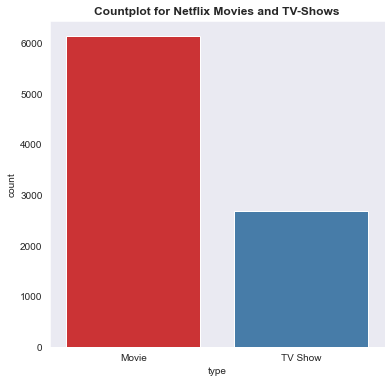

In [28]:
# creating Countplot from Seaborn to show max available content in NETFLIX

sns.set_style('dark')
ax = plt.subplots(figsize = (6, 6))
plt.title('Countplot for Netflix Movies and TV-Shows', fontweight='bold')
ax = sns.countplot(x = 'type', data=netflix_dataset, palette='Set1')

Hence, This plot shows NETFLIX has more **MOVIES** content instead of TV-SHOWS. 

### **In which Year Maximum Movies and TV-Shows are released ?** 

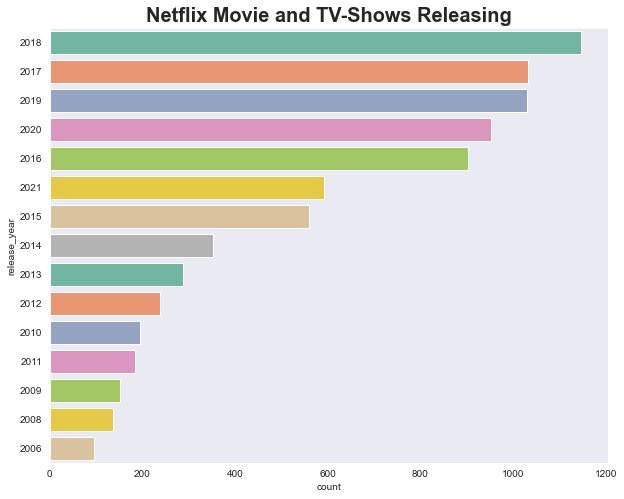

In [29]:
ax = plt.subplots(figsize = (10, 8))
sns.set_style('dark')
plt.title('Netflix Movie and TV-Shows Releasing', fontweight='bold', fontsize=20)
ax = sns.countplot(y = 'release_year', data = netflix_dataset, order = netflix_dataset['release_year'].value_counts().index[0:15], palette='Set2')

This visualization shows that 2018 is the maximum releasing year for Netflix.

### **Dividing Netflix Dataset into two parts Movies and TV-Shows** 

In [30]:
netflix_movies = netflix_dataset[netflix_dataset['type'] == 'Movie']
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [31]:
netflix_tvshows = netflix_dataset[netflix_dataset['type'] == 'TV Show']
netflix_tvshows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


### **Movies and TV-Shows rating Analysis** 

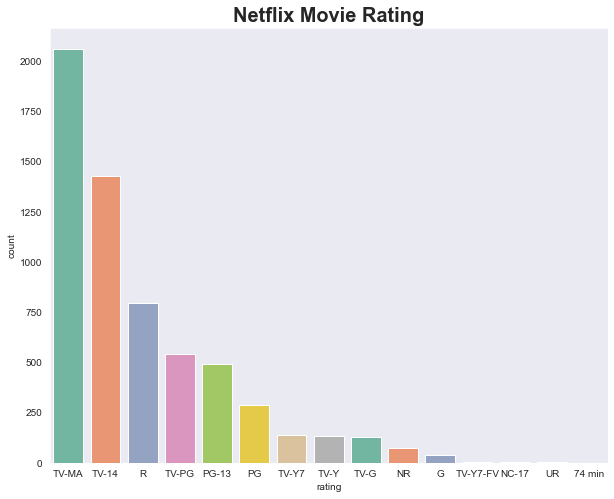

In [32]:
ax = plt.subplots(figsize = (10, 8))
sns.set_style('dark')
plt.title('Netflix Movie Rating', fontweight='bold', fontsize=20)
ax = sns.countplot(x = 'rating', data = netflix_movies, palette = 'Set2', order = netflix_movies['rating'].value_counts().index[0:15])

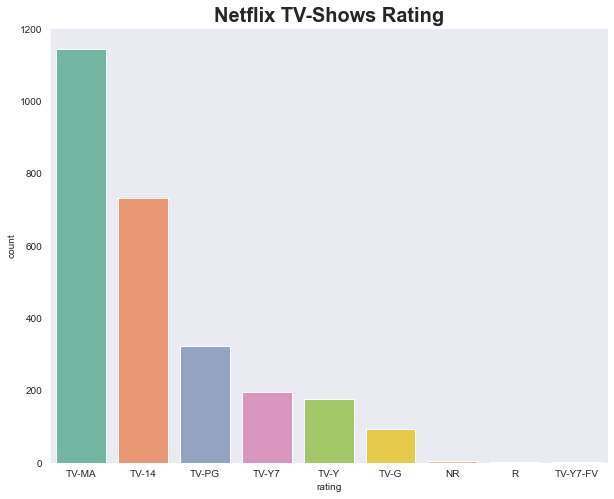

In [33]:
ax = plt.subplots(figsize = (10, 8))
sns.set_style('dark')
plt.title('Netflix TV-Shows Rating', fontweight = 'bold', fontsize=20)
ax = sns.countplot(x = 'rating', data = netflix_tvshows, palette='Set2', order = netflix_tvshows['rating'].value_counts().index[0:15])

Largest Rating in Movies and TV-Shows is of 'TV-MA', according to the TV Parental Guidelines website, means “This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.